In [1]:
import jax
from jax import random, grad, vmap, jit
import jax.numpy as jnp

import matplotlib.pyplot as plt

In [2]:
# def sigmoid(x):
#     return 1./(1. + jnp.exp(-x))

def sigmoid(x):
    return 0.5 * (jnp.tanh(x / 2) + 1)

In [3]:
def N_1(x, p):
  a, w, b = p[0], p[1], p[2]
  z = sigmoid(jnp.dot(w, x) + b)
  return jnp.dot(a, z).squeeze()

def N_2(x, p):
  a, w, b = p[0], p[1], p[2]
  z = sigmoid(jnp.dot(w, x) + b)
  return jnp.dot(a, z).squeeze()

In [4]:
def trial_1(x, p):
  return x*N_1(x, p)

def trial_2(x, p):
  return 1+x*N_2(x, p)

trial_1_vect = vmap(trial_1, (0, None))
trial_2_vect = vmap(trial_2, (0, None))

grad_trial_1 = grad(trial_1, 0)
grad_trial_2 = grad(trial_2, 0)

grad_trial_1_vect = vmap(grad_trial_1, (0, None))
grad_trial_2_vect = vmap(grad_trial_2, (0, None))

In [5]:
key = random.PRNGKey(0)
keys = [key for key in random.split(key, 6)]

In [6]:
m1 = 5
m2 = 7
p = [random.normal(keys[0], shape=(1, m1)), random.normal(keys[1], shape=(m1, 1)), random.normal(keys[2], shape=(m1, 1)),
     random.normal(keys[3], shape=(1, m2)), random.normal(keys[4], shape=(m2, 1)), random.normal(keys[5], shape=(m2, 1))]
# [alpha, w, beta]

In [7]:
def error(x, p):
  p1 = p[:3]
  p2 = p[3:]

  H1 = grad_trial_1_vect(x, p1)-2*trial_1_vect(x, p1)+trial_2_vect(x, p2)+5*x
  H2 = grad_trial_2_vect(x, p2)-3*trial_1_vect(x, p1)-6*trial_2_vect(x, p2)+4
  return .5*jnp.sum(H1**2+H2**2)

grad_error = jit(grad(error, 1))

In [8]:
inputs = jnp.array([-1, -0.75, -0.50, -0.25, 0., 0.25, 0.50, 0.75])

In [9]:
epochs = 101
lr = 0.01

for epoch in range(epochs):
    if epoch % 100  == 0:
        print('epoch: %3d error: %.6f' % (epoch, error(inputs, p)))
    grads = grad_error(inputs, p)
    p = [p[i]-lr*grads[i] for i in range(len(p))]

epoch:   0 error: 118.354691
epoch: 100 error: 17.909756


In [10]:
trial_1_vect(inputs, p[:3])

Array([-1.0227973 , -0.7155859 , -0.4156196 , -0.15605685,  0.        ,
       -0.04196845, -0.3839601 , -1.0692537 ], dtype=float32)

In [11]:
trial_2_vect(inputs, p[3:])

Array([1.0082798 , 1.0059779 , 1.003731  , 1.0021026 , 1.        ,
       0.9879024 , 0.92782503, 0.7121695 ], dtype=float32)

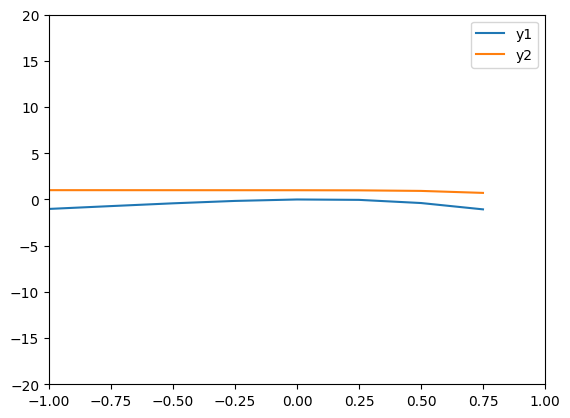

In [12]:
plt.plot(inputs, trial_1_vect(inputs, p[:3]), label='y1')
plt.plot(inputs, trial_2_vect(inputs, p[3:]), label='y2')
ax = plt.gca()
ax.set_xlim([-1, 1])
ax.set_ylim([-20, 20])
plt.legend()
plt.show()

In [21]:
# reset params
p = [random.normal(keys[0], shape=(1, m1)), random.normal(keys[1], shape=(m1, 1)), random.normal(keys[2], shape=(m1, 1)),
     random.normal(keys[3], shape=(1, m2)), random.normal(keys[4], shape=(m2, 1)), random.normal(keys[5], shape=(m2, 1))]

In [22]:
epochs = 1001
lr = 0.01

for epoch in range(epochs):
    if epoch % 100  == 0:
        print('epoch: %3d error: %.6f' % (epoch, error(inputs, p)))
    grads = grad_error(inputs, p)
    p = [p[i]-lr*grads[i] for i in range(len(p))]

epoch:   0 error: 118.354691
epoch: 100 error: 17.909756
epoch: 200 error: 14.074269
epoch: 300 error: 9.721235
epoch: 400 error: 6.277142
epoch: 500 error: 4.250597
epoch: 600 error: 2.978712
epoch: 700 error: 2.149574
epoch: 800 error: 1.598742
epoch: 900 error: 1.218871
epoch: 1000 error: 0.951204


In [23]:
trial_1_vect(inputs, p[:3])

Array([-1.057527  , -0.6249291 , -0.22278367,  0.04917289, -0.        ,
       -0.6475281 , -2.3330925 , -6.064518  ], dtype=float32)

In [24]:
trial_2_vect(inputs, p[3:])

Array([1.0533614, 0.8921483, 0.7666067, 0.7505618, 1.       , 1.7289627,
       3.0476472, 4.7216625], dtype=float32)

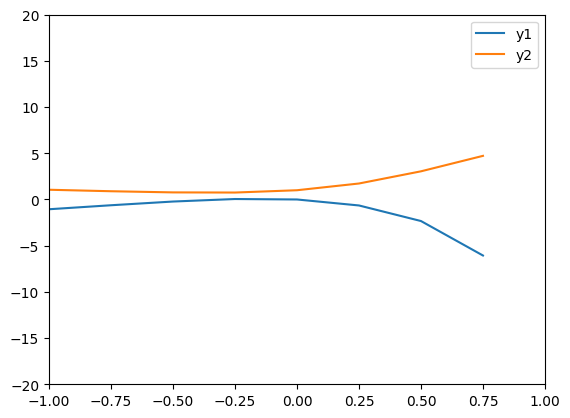

In [25]:
plt.plot(inputs, trial_1_vect(inputs, p[:3]), label='y1')
plt.plot(inputs, trial_2_vect(inputs, p[3:]), label='y2')
ax = plt.gca()
ax.set_xlim([-1, 1])
ax.set_ylim([-20, 20])
plt.legend()
plt.show()